
### Random Forest Regressor 
Importing relevent library

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set() # all plot will cover on seaborn style

In [38]:
# Loding the data.
car = pd.read_csv('Car_cleaned_with_Model.csv')
car.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in car.columns:
    if car[i].dtypes == 'object':
        car[i] = le.fit_transform(car[i])

In [40]:
# takking X and y
X = car.drop('Price', axis=1)
y = car['Price']

X.shape, y.shape

((3867, 8), (3867,))

In [41]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3093, 8), (3093,), (774, 8), (774,))

In [42]:
# importing RandomForest Regressior
from sklearn.ensemble import  RandomForestRegressor

# creating instance of randomforest regressor
rf_1 = RandomForestRegressor( n_estimators=100,random_state=10)

# checking the hyperparameter of the randomforest 
rf_1.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 10,
 'verbose': 0,
 'warm_start': False}

In [56]:
# first we will create a base model then we will go for hyperparameter tuning.
rf_1.fit(X_train, y_train)

RandomForestRegressor(random_state=10)

In [45]:
# checking the perofrmance on the training
y_pred_train = rf_1.predict(X_train)

# importing the rmse from sklearn
from sklearn.metrics import  mean_squared_error,mean_absolute_error
mae_train=(mean_absolute_error(y_train, y_pred_train))
print('MAE on Traning data {}'.format(mae_train))

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

print('RMSE on Traning data {}'.format(rmse_train))


MAE on Traning data 1007.9346674172517
RMSE on Traning data 2044.3888066552613


In [46]:
# error on testing data
y_pred_test = rf_1.predict(X_test)
mae_test=(mean_absolute_error(y_test, y_pred_test))
print('MAE on Traning data {}'.format(mse_test))

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print('RMSE on Testing data {}'.format(rmse_test))

MAE on Traning data 25675408.97488901
RMSE on Testing data 5067.090780209983


In [47]:
# chceking the socre on traning data.
from sklearn.metrics import r2_score

y_pred_train = rf_1.predict(X_train)
r2_score_train=r2_score(y_train, y_pred_train)
print('Traning Score: {}'.format(r2_score(y_train, y_pred_train)))

Traning Score: 0.9881897021157224


In [48]:
# chceking the socre for testing.

y_pred_test = rf_1.predict(X_test)
r2_score_test=r2_score(y_test, y_pred_test)
print('Testing Score: {}'.format(r2_score(y_test, y_pred_test)))

Testing Score: 0.9366161061077594


Text(0.5, 1.0, 'Testing Time')

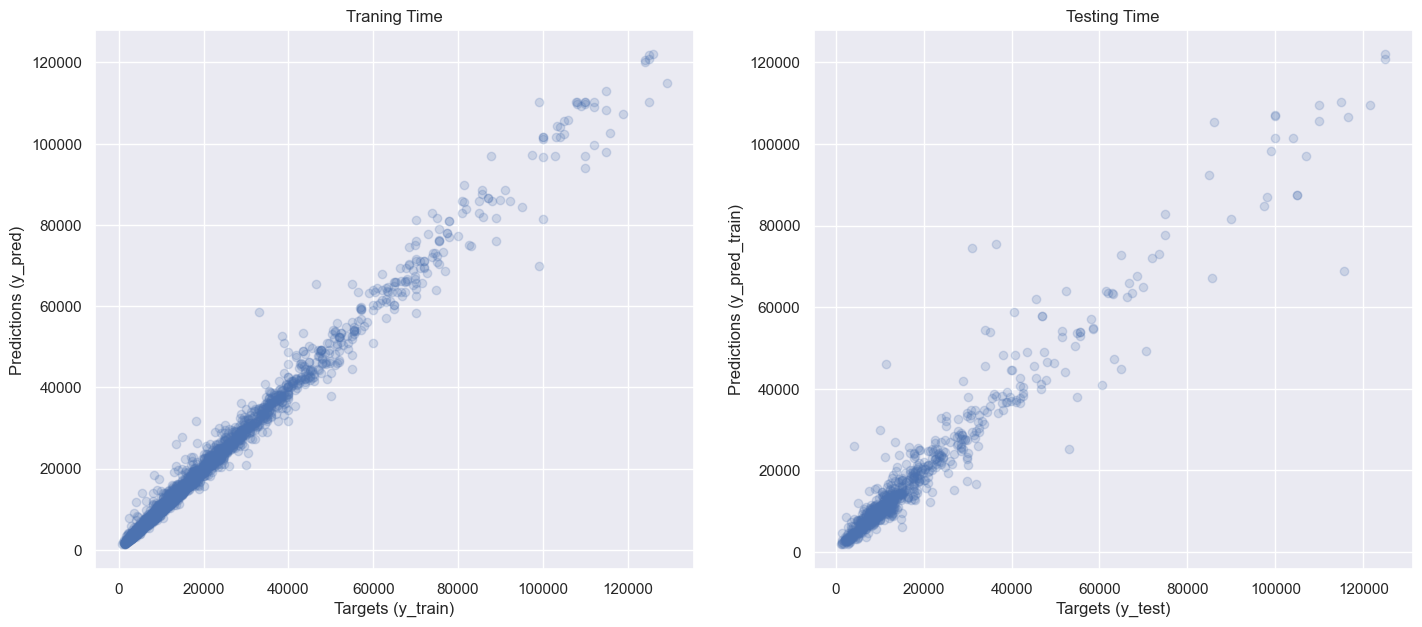

In [49]:
# plotting the traning
# check the prediction with the original values
plt.figure(figsize=(17,7))
y_pred_train = rf_1.predict(X_train)
plt.subplot(1,2,1)
plt.scatter(y_train, y_pred_train, alpha=0.2)
plt.xlabel('Targets (y_train)')
plt.ylabel('Predictions (y_pred)')
plt.title('Traning Time')

# plotting testing error
y_pred_test = rf_1.predict(X_test)
plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_test, alpha=0.2)
plt.xlabel('Targets (y_test)')
plt.ylabel('Predictions (y_pred_train)')
plt.title('Testing Time')


## Checking the residual for base model.

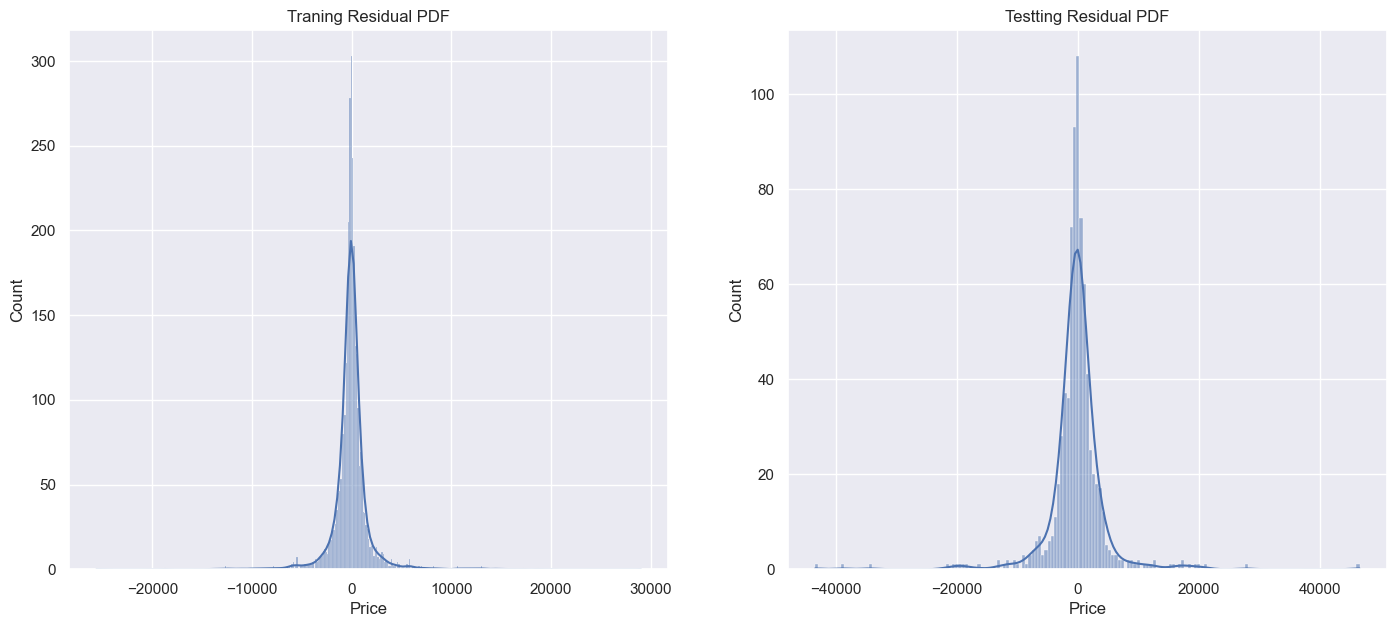

In [61]:
# plotting the distribution of the residual
residual_train = (y_train - rf_1.predict(X_train))
residual_test = (y_test - rf_1.predict(X_test))

# ploting the distribution of the residual on training
plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
sns.histplot(residual_train,kde= True)
plt.title('Traning Residual PDF')

# ploting the distribution of the residual
plt.subplot(1,2,2)
sns.histplot(residual_test,kde= True )
plt.title('Testting Residual PDF')
plt.show()

In [57]:
# Creating a dataframe to compare the result and prediction.
df_eval = pd.DataFrame(rf_1.predict(X_test), columns=['Prediction'])
# adding column
y_test = y_test.reset_index(drop=True)
df_eval['Tareget'] = y_test

# creating residual columns and difference column
df_eval['Residual'] = df_eval['Tareget'] - df_eval['Prediction']
df_eval['Difference%'] = np.absolute(df_eval['Residual'] / df_eval['Tareget']*100)
# checking the performance data 
df_eval.head(10)

,Prediction,Tareget,Residual,Difference%
0,17438.320000,19000.0,1561.680000,8.219368
1,6075.200000,5500.0,-575.200000,10.458182
2,25032.617500,19200.0,-5832.617500,30.378216
3,12812.753333,11900.0,-912.753333,7.670196
4,8452.440000,7750.0,-702.440000,9.063742
5,26909.440000,13500.0,-13409.440000,99.329185
6,12847.830000,12700.0,-147.830000,1.164016
7,53834.690000,55555.0,1720.310000,3.096589
8,4729.000000,1500.0,-3229.000000,215.266667
9,12026.500000,11000.0,-1026.500000,9.331818


In [58]:
# # getting all values.
# pd.options.display.max_rows = 999
# # setting all value two digits after dot.
# pd.set_option('display.float_format', lambda x: '%.2f' % x)
# df_eval.sort_values(by=['Difference%'])

In [59]:
# description of the eval_df
df_eval.describe()

,Prediction,Tareget,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,18807.197075,18602.017829,-205.179246,17.295077
std,19486.116171,20139.559184,5066.208767,30.407354
min,1808.620000,1200.000000,-43484.120000,0.047809
25%,7841.739827,7500.000000,-1324.360000,4.556851
50%,11806.495000,11900.000000,-150.250000,9.901102
75%,21631.402500,20999.060000,1107.275000,20.654495
max,121931.900000,125000.000000,46591.900000,531.365122


The `Difference%` column is our only interest, the difference is far better than `Linear Regression`

In [60]:
metrics_df = pd.DataFrame({
    'Dataset': ['Train', 'Test'],
    'MAE': [mae_train, mae_test],
    'RMSE': [rmse_train, rmse_test],
    'R² Score': [r2_score_train, r2_score_test]
})
metrics_df

,Dataset,MAE,RMSE,R² Score
0,Train,1007.934667,2044.388807,0.988190
1,Test,2536.602362,5067.090780,0.936616
